# Эффективность нового мерчандайзинга / Оффлайн A/B-тест

---

<p align="center">
  <img src="https://oborot.ru/wp-content/uploads/2022/03/lerua-merlen-1-1024x681.jpg" width=800 height=500 />
</p>

<div class="alert alert-info">
    
<h2> Постановка задачи </h2>

В магазине A (назовем его тестовый), провели некое изменение, к примеру, мерчандайзинга товаров (расставили по цветам, разнесли на разные стеллажи и т.д.). Задача — оценить влияние данного изменения на чековые метрики продаж и товарооборот
    
</div>

<div class="alert alert-success" role="alert">
<h2> Общий принцип анализа </h2>
<p>
<b> 
Проведение оффлайн A/B-теста</b> – берем тестовый магазин, ищем пять аналогичных по динамике интересующей метрики магазинов за год до внедрения новой имплантации – контрольных магазинов. Сравниваем метрику тестового магазина и пяти контрольных магазинов за период времени (два месяца и более) после внедрения новой имплантации

Проверяем статзначимость разницы метрики между тестовым магазином и каждым из контрольных, а также значимость между средней разницей контрольных. Если критерий показал значимое отличие разницы от нуля, то принимаем гипотезу об изменении метрики (в положительную или отрицательную сторону)

Проведя подобный анализ по всем магазинам с новой имплантацией, сможем понять, повлияла ли она статзначимо на метрики 
</p>
  
<hr>
<h3> Детальнее</h3>
<p> <ol>
    <li>Выгрузка из GreenPlum оффлайн продаж (без возвратов и услуг) за год (52 недели) до изменения и до актуальной даты по каждому магазину и интересующему подотделу (типу) с расчетом среднего за неделю среднего чека, штук товара в чеке, уникальных артикулов в чеке, а также привлекательности подотдела в отделе (типа в подотделе)
Из выгрузки исключены все ЦИЗы, дарксторы, закрывшиеся и несуществующие магазины</li>
    <li><b>Тестовыми</b> будут магазины с изменениями в имплантации, произошедшими более двух месяцев назад (агрегация берется понедельно, поэтому менее 8 значений (8 недель, 2 месяца) мало для расчета статистического критерия)
<b>контрольными</b> будут все магазины, где изменение не произошло, а также магазины, где изменение произошло совсем недавно (менее трех недель назад)</li>
    <li><b>Нормализуем</b> интересующую <b>метрику</b> за весь период (52 недели до изменения – контрольный и период после него – тестовый) на среднее значение метрики по 52 неделям контрольного периода. Так постараемся привести магазины к единой шкале, чтобы учесть только динамику интересующей метрики</li>
    <li>Для того, чтобы найти контрольные магазины к тестовому <b>сопоставляем периоды</b> (контрольный и тестовый с количество недель в них должно быть одинаково для каждой пары магазинов, чтобы корректно рассчитать ошибку) и <b>считаем RMSE</b> (корень из среднеквадратической ошибки) между распределениями метрики тестового и контрольных магазинов в контрольном периоде, затем выбираем топ-5 по минимальному значению RMSE магазинов</li>
    <li><b>Считаем разность между значениями метрики</b> тестового магазина и каждого из пяти контрольных магазинов, также суммируем все разности для расчета общей разности теста и контроля</li>
    <li><b>Определяем</b> одновыборочным двусторонним t-критерием <b>статзначимость</b> отличия среднего разницы теста и контроля от нуля. Статзначимость считаем не между самими распределениями метрик (т.к. форма распределения сильно отлична от нормального), а между разницами распределения (она в большинстве своём распределена нормально). Можно использовать непараметрический U-критерий, но это в другой раз
Таким образом <b>нулевая гипотеза H0</b> : среднее значение разницы метрики тестового и контрольного магазина в контрольном периоде равна нулю, <b>альтернативная гипотеза H1</b> : среднее значение разницы метрики тестового и контрольного магазина в контрольном периоде НЕ равна нулю. Также аналогично проверяем гипотезы об отличии среднего значения средней разницы метрики контрольных магазинов от нуля</li>
    <li>На выходе получаем <b>таблицу со значениями</b>:
    <ul>
        <li>Тип магазина (тест или контроль)</li>
        <li>Название магазина</li>
        <li>RMSE между тестовым и контрольным магазином в контрольном периоде</li>
        <li>p-value одновыборочного двустороннего t-критерия (гипотеза о равенстве среднего значения разницы между тестом и контролем нулю для контрольного периода)</li>
        <li>среднее значение метрики по неделям тестового периода для каждого магазина</li>
        <li>относительное изменение метрики между тестовым и контрольными магазинами в тестовом периоде (в %)</li>
        <li>абсолютное изменение метрики между тестовым и контрольными магазинами в тестовом периоде (в ед. измерения метрики)</li>
        <li>p-value одновыборочного двустороннего t-критерия (гипотеза о равенстве среднего значения разницы между тестом и контролем нулю для тестового периода)</li>
       <li>Вердикт по итогу расчета статкритерия: 'yes' - опровергли нулевую гипотезу (то, что нам нужно, чтобы доказать наличие статзначимого изменения), 'no' - приняли нулевую гипотезу (статзначимого изменения нет)
           </li>
</ol>
</p>
</div>

Импорт библиотек

In [1]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats as st
from datetime import timedelta as td
from simple_colors import *
from prettytable import PrettyTable

import sqlalchemy as sa
import getpass

from IPython.display import display

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

Подключение к GreenPlum

In [2]:
# user = input()
# password = getpass.getpass()

In [3]:
# engine_gp = sa.create_engine("postgresql://{}:{}@HOST:PORT/DB".format(user, password))

Скрипт, выгружающий из GreenPlum оффлайн продажи (без возвратов и услуг) по каждому магазину и интересующему подотделу (типу) с расчетом среднего за неделю среднего чека, штук товара в чеке, уникальных артикулов в чеке, а также привлекательности подотдела в отделе (типа в подотделе)

Из выгрузки исключены все ЦИЗы, дарксторы, закрывшиеся и несуществующие магазины

По итогу должна получиться таблица с колонками:
* `purch_week` - дата начала календарной недели
* `store_id` - номер магазина
* `store_name` - название магазина
* `rec_total` - количество чеков по отделу/подотделу всего
* `rec` - количество чеков по интересующему подотделу/типу
* `aov` - средний чек по интересующему подотделу/типу
* `qty` - валовое количество товара в чеке по интересующему подотделу/типу
* `sku` - уникальное количество артикулов в чеке по интересующему подотделу/типу
* `priv` - отношение чеков по интересующему подотделу/типу к количеству чеков по отделу/подотделу всего (привлекательность по чекам)

In [4]:
# query = f""" 
# drop table if exists pred_agg_purch;
# create temp table pred_agg_purch as
# select  date_trunc('week', opened_date)::date as purch_week
# 		, coalesce(receiver_storeid, store_id) as store_id
#         , receipt_header_id as rec_id
# 		, sum(line_turnover) as turnover
# 		, sum(line_quantity) as quantity
# 		, count(distinct line_article_id) as article
# from    table_name
# where  item_hierarchy_sub_department = '745'
# and opened_date between '2021-04-01' and '2022-12-11'
# and line_type in ('Sales', 'pickedUp orders')
# and line_item_type = 'Normal'
# and coalesce(line_order_channel_calculated, 'OFFLINE') = 'OFFLINE'
# and coalesce(receiver_storeid, store_id) between 2 and 181
# and coalesce(receiver_storeid, store_id) not in (45, 62, 63, 66, 90, 113, 139, 162, 168, 171, 174, 176)
# group by 
# 		1, 2, 3;
		
	
# select	pap.purch_week
# 		, pap.store_id
# 		, pap.store_id || ' ' || s.store_name as store_name
# 		, tp.rec_total
# 		, count(distinct rec_id) as rec
# 		, avg(turnover) as aov
# 		, avg(quantity) as qty
# 		, avg(article) as sku
# from	pred_agg_purch pap
# left join
# 		(
# 		select	store as store_id
# 				, store_name_2 as store_name
# 		from	dds.v_dict_stores
# 		) s
# using(store_id)
# inner join
# 		(
# 		select	date_trunc('week', opened_date)::date as purch_week
# 				, coalesce(receiver_storeid, store_id) as store_id
# 				, count(distinct receipt_header_id) as rec_total
# 		from    table_name
# 		where item_hierarchy_department = '7'
#       and opened_date between '2021-04-01' and '2022-12-11'
# 		and line_type in ('Sales', 'pickedUp orders')
# 		and line_item_type = 'Normal'
# 		and coalesce(line_order_channel_calculated, 'OFFLINE') = 'OFFLINE'
# 		and coalesce(receiver_storeid, store_id) between 2 and 181
# 		and coalesce(receiver_storeid, store_id) not in (45, 62, 63, 66, 90, 113, 139, 162, 168, 171, 174, 176)
# 		group by 
# 				1, 2
# 		) tp
# on tp.purch_week = pap.purch_week
# and tp.store_id = pap.store_id
# group by 
# 		1, 2, 3, 4;
# """

# purch = pd.read_sql_query(sa.text(query), engine_gp)

# purch.to_csv('purch.csv', index=False)

# purch['priv'] = (purch['rec'] / purch['rec_total'])*100  

# purch.info()

# display(purch.sample(3))

Для, того чтобы не зависеть от работотспособности GreenPlum, скрипт сохраняет данные в `.csv`. Импортируем их

In [5]:
purch = pd.read_csv('purch.csv', parse_dates=['purch_week'], dayfirst=True)

purch['priv'] = (purch['rec'] / purch['rec_total'])*100

purch.info()

display(purch.sample(3))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9686 entries, 0 to 9685
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   purch_week  9686 non-null   datetime64[ns]
 1   store_id    9686 non-null   int64         
 2   store_name  9686 non-null   object        
 3   rec_total   9686 non-null   int64         
 4   rec         9686 non-null   int64         
 5   aov         9686 non-null   float64       
 6   qty         9686 non-null   float64       
 7   sku         9686 non-null   float64       
 8   priv        9686 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(3), object(1)
memory usage: 681.2+ KB


,purch_week,store_id,store_name,rec_total,rec,aov,qty,sku,priv
7337,2022-07-25,147,147 Краснодар 2 Адыгея,2855,1463,1184.630021,2.076555,1.819549,51.243433
869,2022-12-05,21,21 Воронеж Град,3256,1694,1087.044734,1.795159,1.630460,52.027027
8177,2022-06-20,68,68 Иркутск Набережная,3218,1761,1300.220261,2.077229,1.751846,54.723431


Создадим функцию `offline_abt()`, реализующую вышеописанныую логику с параметрами:
* `test_mag` - тестовый магазин
* `change_date` - дата изменения
* `metric` - название тестируемой метрики
* `constrain_store` - магазины, с которыми сравнивать нельзя

In [6]:
def offline_abt(test_mag, change_date, metric, constrain_store):   
    '''
    Принимает на вход номер тестового магазина, дату изменения, название тестируемой метрики и список магазинов,
    с которыми сравнивать нельзя. 
    
    Далее: 
    * Находит по минимальному значению RMSE пять контрольных магазинов к тестовому в контрольном периоде
      (52 недели до даты изменения)
    * Расчитывает статзначимость изменения метрики между тестовым и контрольными магазинами в контрольном периоде
      (после даты изменения)
    
    Выводит графики:
    * нормализованной метрики тестового и пяти контрольных магазинов
    * разности метрики пяти контрольных магазинов и средней разности по контрольным магазинам от тестового
    * распределения разностей между тестом и контролем в периоде после изменения
    
    Результат - таблица со значениями:
    * тип магазина (тест или контроль)
    * название магазина
    * RMSE между тестовым и контрольным магазином в контрольном периоде
    * p-value одновыборочного двустороннего t-критерия (гипотеза о равенстве среднего значения разницы между 
      тестом и контролем нулю для контрольного периода)
    * среднее значение метрики по неделям тестового периода для каждого магазина
    * относительное изменение метрики между тестовым и контрольными магазинами в тестовом периоде (в %)
    * абсолютное изменение метрики между тестовым и контрольными магазинами в тестовом периоде (в ед. измерения метрики)
    * p-value одновыборочного двустороннего t-критерия (гипотеза о равенстве среднего значения разницы между 
      тестом и контролем нулю для тестового периода)
    * вердикт по итогу расчета статкритерия: 'yes' - опровергли нулевую гипотезу (то, что нам нужно, чтобы 
      доказать наличие статзначимого изменения), 'no' - приняли нулевую гипотезу (статзначимого изменения нет)
    '''
    # окруляем дату изменения до начала недели
    change_date =  pd.to_datetime(change_date) - pd.offsets.Week(weekday=0)
    # считаем начало контрольного периода (год (52 недели) до изменения)
    past_date = change_date - td(weeks=52)
    
    
    # в цикле собираем в словарь количество недель в тестовом и контрольном периоде по каждому магазину      
    test_len_dict = {}
    for i in list(purch['store_id'].unique()):
        test_mag_a_a_week_count = purch[(purch['store_id'] == i) & 
                                        (purch['purch_week'].between(past_date, change_date, inclusive='left'))]\
                                       ['purch_week'].nunique()
        test_mag_a_b_week_count = purch[(purch['store_id'] == i) & (purch['purch_week'] >= change_date)]\
                                       ['purch_week'].nunique()
        test_len_dict[i.astype(str)] = test_mag_a_a_week_count + test_mag_a_b_week_count

        
    # сохраняем количество недель в тестовом и контрольном периоде по тестовому магазину
    test_store_week_count = test_len_dict[test_mag]

    
    # в цикле в список попадают только магазины с совпадающим количеством недель в тестовом и контрольном периодах
    good_mag = []
    for i in list(test_len_dict.keys()):
        if test_len_dict[i] == test_store_week_count:
            good_mag.append(i)

            
    # из списка с подходящими магазинами вычитаются магазины, которые не должны попасть в сравнение с тестовым            
    good_mag = list(set(good_mag).difference(constrain_store))

    
    # в цикле по магазинам, подходящим в качестве контрольных и тестовому магазину нормализуем 
    # метрику по среднему значению метрики в контрольном периоде, результат складываем в датафрейм
    normalized_metric = pd.DataFrame()
    for i in good_mag:
        calc = purch[(purch['store_id'].astype(str) == i) & (purch['purch_week'] >= past_date)]\
                    [['purch_week', 'store_id', metric]].reset_index(drop=True)
        mean = calc[calc['purch_week'].between(past_date, change_date, inclusive='left')][metric].mean()
        calc[f'normalized_{metric}'] = (calc[metric] - mean) / calc[metric].std()

        normalized_metric = normalized_metric.append(calc[['purch_week', 'store_id', f'normalized_{metric}']],\
                                                         ignore_index=True)
        
        
    # соединяем датафрейм с нормализованной метрикой с исходным датафреймом
    purch_metric = purch[['purch_week', 'store_id', 'store_name', metric]]\
                        .merge(normalized_metric, on=['purch_week', 'store_id'], how='right')

    
    # разделяем датафреймы на тестовый (с тестовым магазином) и контрольный (с контрольными магазинами)
    test_sample = purch_metric[purch_metric['store_id'].astype(str) == test_mag]
    control_sample = purch_metric[purch_metric['store_id'].astype(str) != test_mag]

    
    # в цикле считаем RMSE (корень из СКО) между тестовым и каждым из контрольных магазинов
    store = []
    rmse = []
    p_value_a_a = []
    for i in list(control_sample['store_id'].unique()):
        test_array = test_sample[test_sample['purch_week'] <= change_date]\
                              .sort_values(by='purch_week')[f'normalized_{metric}']
        control_array = control_sample[(control_sample['store_id'] == i) & \
                                                (control_sample['purch_week'] <= change_date)]\
                                 .sort_values(by='purch_week')[f'normalized_{metric}']
        store.append(i)
        rmse.append(np.sqrt(np.square(np.subtract(np.array(test_array), np.array(control_array))).mean()))
        
    
    # формируем датафрейм "номер магазина -> значение RMSE" и выбираем топ-5 по минимальному значению ошибки
    rmse_df = pd.DataFrame({'store_id': store, 'rmse': rmse})
    rmse_df = rmse_df.nsmallest(5, 'rmse', keep='first').reset_index(drop=True)
    
    # соединяем в широкий датафрейм со всеми метриками тестовый магазин и 5 контрольных 
    plot_df = purch_metric[purch_metric['store_id'].astype(str) == test_mag]\
                         .merge(purch_metric[purch_metric['store_id'] == rmse_df['store_id'][0]],
                                on='purch_week', how='inner', suffixes=(None, '_control#1'))
    for i in list(range(1, 5)):
        plot_df = plot_df.merge(purch_metric[purch_metric['store_id'] == rmse_df['store_id'][i]],
                                on='purch_week', how='inner', suffixes=(None, f'_control#{i+1}'))

        
    # в цикле считаем разность нормализованной метрики между тестом и пятью контролями
    for i in list(range(1, 6)):
        plot_df[f'gap#{i}'] = plot_df[f'normalized_{metric}'] - plot_df[f'normalized_{metric}_control#{i}']
    # также считаем общую разность
    plot_df['gap_total'] = plot_df[['gap#1', 'gap#2', 'gap#3', 'gap#4', 'gap#5']].mean(axis=1)
    
    
    # в цикле выводим названия тестового и контрольных магазинов, значение RMSE и строим графики 
    # метрики по неделям для теста и контролей
    for i, j, h in zip(list(range(0, 5)), ['b', 'g', 'm', 'y', 'k'], [blue, green, magenta, yellow, black]):

        print('Тест:', red(plot_df['store_name'][0], ['bold']))
        print(f'Контроль #{i+1}:', h(plot_df[f'store_name_control#{i+1}'][0], ['bold']))
        print('RMSE:', black(rmse_df['rmse'][i].round(3).astype(str), ['bold']))

        plt.figure(figsize=(9, 4))
        plt.plot(plot_df['purch_week'].sort_values(), plot_df.sort_values(by='purch_week')[f'normalized_{metric}'],\
                     'r', label='Тест')
        plt.plot(plot_df['purch_week'].sort_values(), plot_df.sort_values(by='purch_week')\
                     [f'normalized_{metric}_control#{i+1}'], j, label=f'Контроль #{i+1}')
        plt.axvline(change_date, color='orange')
        plt.axhline(0, color='grey', linestyle = '--')
        plt.legend()
        plt.title(f'Нормализованный {metric} по неделям', fontweight='bold')
        plt.xlabel('Неделя')
        plt.ylabel(f'Нормализованный {metric}')
        plt.annotate('Изменение ' + change_date.strftime('%Y-%m-%d'), xy=(change_date + td(weeks=1), -1))
        plt.show()
    
    
    # формируем списки для столбцов датафрейма с итоговыми значениями
    store_type = ['Тест', 'Контроль#1', 'Контроль#2', 'Контроль#3', 'Контроль#4', 'Контроль#5']
    store_name = []
    rmse_value = []
    p_value_a_a = []
    metric_value = []
    relative_value = []
    absolute_value = []
    p_value = []
    verdict = []
    
    
    # для тестового магазина добавляем только название и значение метрики в тестовом периоде
    store_name.append(plot_df['store_name'][0])
    rmse_value.append(np.nan)
    p_value_a_a.append(np.nan)
    metric_value.append(plot_df[plot_df['purch_week'] >= change_date][f'{metric}'].mean())
    relative_value.append(np.nan)
    absolute_value.append(np.nan)
    p_value.append(np.nan)
    verdict.append(np.nan)

    
    # в цикле строим графики разностей теста с контролями и добавляем значения по контрольным 
    # магазинам: название магазина, RMSE, статзначимость отличия среднего 
    # разницы теста и контроля от нуля (в контрольном периоде), значение метрики, относительное 
    # и абсолютное изменение также определяем одновыборочным двусторонним t-критерием статзначимость 
    # отличия среднего разницы теста и контроля от нуля (в тестовом периоде)
    plt.figure(figsize=(15, 5))
    
    for i, j in enumerate(['--b', '--g', '--m', '--y', '--k'], start=1):
        plt.plot(plot_df['purch_week'].sort_values(), plot_df.sort_values(by='purch_week')[f'gap#{i}'],
                 j, label='Разность c ' + plot_df[f'store_name_control#{i}'][0])
        
        store_name.append(plot_df[f'store_name_control#{i}'][0])
        rmse_value.append(rmse_df['rmse'][i-1])
        p_value_a_a.append(st.ttest_1samp(plot_df[plot_df['purch_week'] < change_date][f'gap#{i}'], 0).pvalue)
        metric_value.append(plot_df[plot_df['purch_week'] >= change_date][f'{metric}_control#{i}'].mean())
        relative_value.append((1 - (plot_df[plot_df['purch_week'] >= change_date][f'{metric}_control#{i}'].mean() / \
                                    plot_df[plot_df['purch_week'] >= change_date][f'{metric}'].mean()))*100)
        absolute_value.append(plot_df[plot_df['purch_week'] >= change_date][f'{metric}'].mean() - \
                              plot_df[plot_df['purch_week'] >= change_date][f'{metric}_control#{i}'].mean())
        pvalue = st.ttest_1samp(plot_df[plot_df['purch_week'] >= change_date][f'gap#{i}'], 0).pvalue
        p_value.append(pvalue)
        if pvalue > 0.05:
            verdict.append('no')
        else:
            verdict.append('yes')
            
    plt.plot(plot_df['purch_week'].sort_values(), plot_df.sort_values(by='purch_week')['gap_total'],
             'r', linewidth=3, label='Разность cо средним по всем контролям')
    plt.axvline(change_date, color='orange')
    plt.axhline(0, color='grey', linestyle = '--')
    plt.legend()
    plt.title(f'Разности нормализованного {metric} контрольных магазинов с тестовым по неделям', fontweight='bold')
    plt.xlabel('Неделя')
    plt.ylabel(f'Разность нормализованного {metric}')
    plt.annotate('Изменение ' + change_date.strftime('%Y-%m-%d'), xy=(change_date + td(weeks=1), 1))
    plt.show()
     
    
    # соединяем списки со значениями в итоговый датафрейм
    total_df = pd.DataFrame({'Тип': store_type, 'Магазин': store_name,
                             'RMSE': rmse_value, 'p-value(контр.)': p_value_a_a, f'{metric}': metric_value,
                             'Относит.изм.': relative_value, 'Абсол.изм.': absolute_value, 
                             'p-value(тест)': p_value, 'Вердикт': verdict})  
    
    
    # считаем p-value для средней разности теста и контролей
    pvalue_a_a_total = st.ttest_1samp(plot_df[plot_df['purch_week'] < change_date]['gap_total'], 0).pvalue.round(4)
    pvalue_total = st.ttest_1samp(plot_df[plot_df['purch_week'] >= change_date]['gap_total'], 0).pvalue.round(4)
    if pvalue_total > 0.05:
        verdict_total = 'no'
    else:
        verdict_total = 'yes'
    
    
    # считаем среднее для метрик по контрольным магазинам и форматируем значения
    total_df.loc[len(total_df.index)] = ['Среднее', '', np.nan, pvalue_a_a_total,
                                                        total_df[f'{metric}'][1:5].mean(),
                                                        total_df['Относит.изм.'][1:5].mean(),
                                                        total_df['Абсол.изм.'][1:5].mean(),
                                                        pvalue_total, verdict_total]
    total_df['p-value(контр.)'] = total_df['p-value(контр.)'].round(4)
    total_df['RMSE'] = total_df['RMSE'].round(3)
    total_df[f'{metric}'] = total_df[f'{metric}'].round(2)
    total_df['Относит.изм.'] = total_df['Относит.изм.'].apply(lambda x: '{:.1f}%'.format(x))
    total_df['Абсол.изм.'] = total_df['Абсол.изм.'].round(2)
    total_df['p-value(тест)'] = total_df['p-value(тест)'].round(4)
    
    
    # в цикле строим гистограммы разностей между тестом и контролем в контрольном периоде
    fig, axs = plt.subplots(2, 3, figsize=(15, 8))
    fig.suptitle('Распределение разностей между тестом и контролем в ТЕСТОВОМ периоде (после изменения)',\
                 fontweight='bold')
    for i, j, h in zip(list(range(1, 6)), ['b', 'g', 'm', 'y', 'k'], [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1)]):
        sns.distplot(plot_df[plot_df['purch_week'] >= change_date][f'gap#{i}'], ax=axs[h], color=j)
        axs[h].set_title('Разность с ' + plot_df[f'store_name_control#{i}'][0])
        axs[h].set_xlabel('')
        axs[h].set_ylabel('')
    sns.distplot(plot_df[plot_df['purch_week'] >= change_date]['gap_total'], ax=axs[1, 2], color='r')
    axs[1, 2].set_title('Разность cо средним по всем контролям')
    axs[1, 2].set_xlabel('')
    axs[1, 2].set_ylabel('')
    plt.show()
    print()
    
    # меняем форматирование таблицы на PrettyTable (для более красивого и удобного вывода)
    pretty_df = PrettyTable()
    pretty_df.field_names = total_df.columns
    pretty_df.add_rows(total_df.apply(lambda row: row.to_list(), axis=1))
    pretty_df.align = 'l'
    print(pretty_df)

Вызовем функцию `offline_abt()` с необходимыми параметрами

Тест: 56 Юдино
Контроль #1: 117 Москва ЗИЛ
RMSE: 0.258


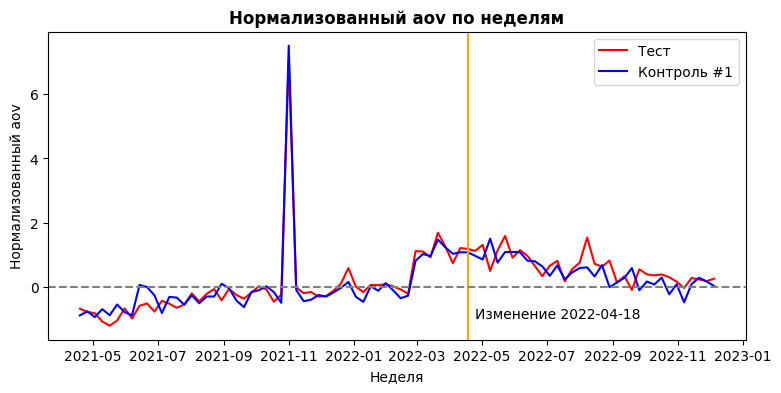

Тест: 56 Юдино
Контроль #2: 20 Лефортово
RMSE: 0.312


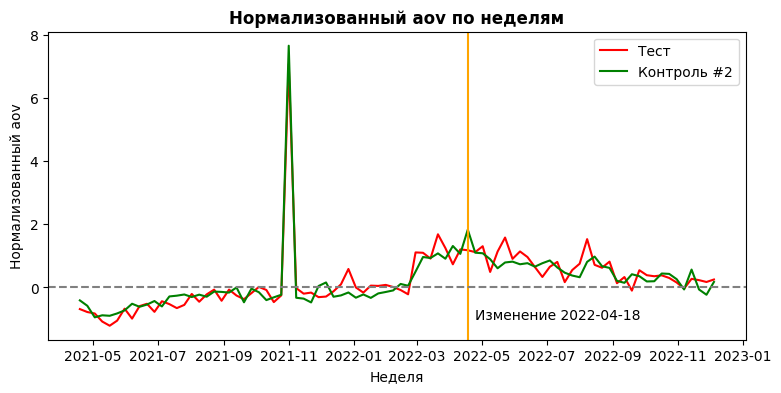

Тест: 56 Юдино
Контроль #3: 40 Шолохово
RMSE: 0.321


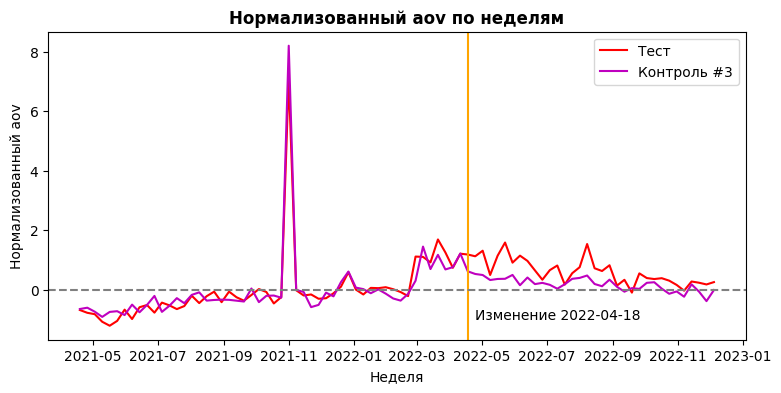

Тест: 56 Юдино
Контроль #4: 3 Красногорск
RMSE: 0.325


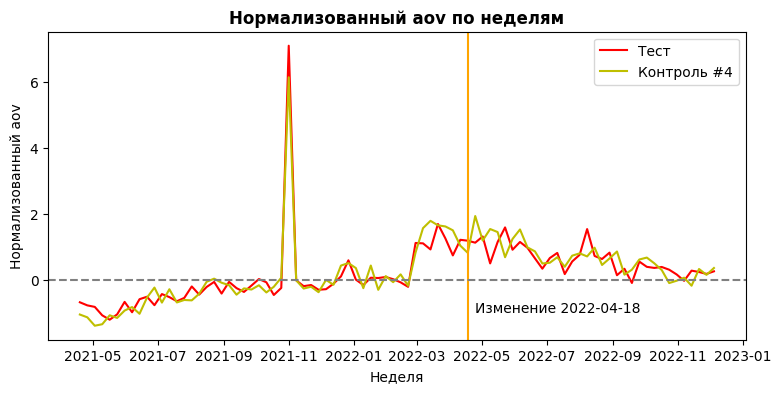

Тест: 56 Юдино
Контроль #5: 2 Мытищи
RMSE: 0.363


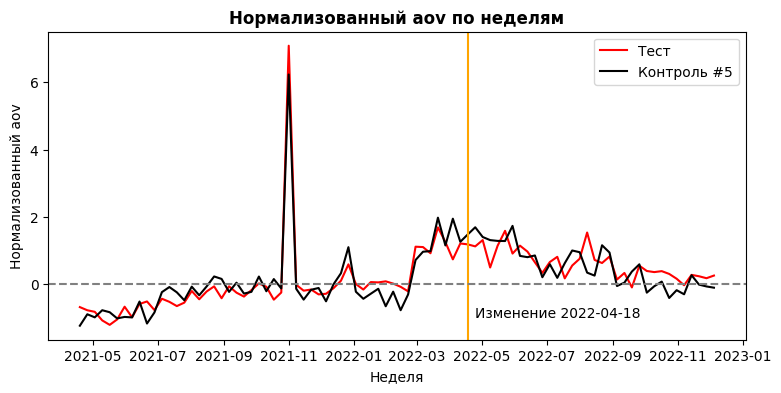

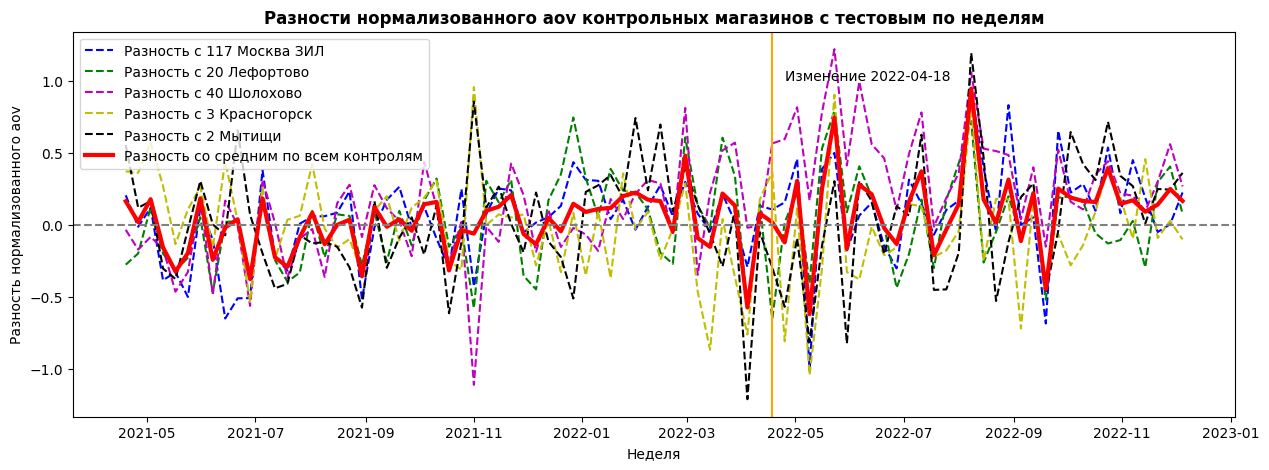

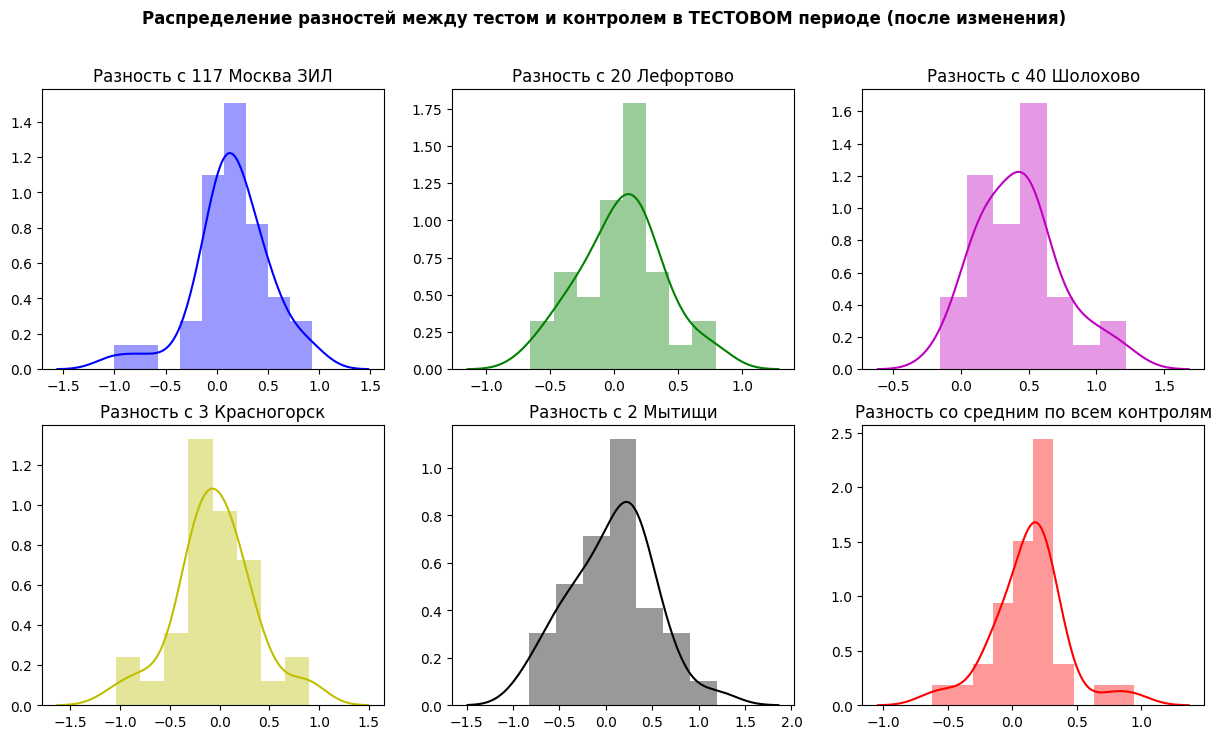


+------------+----------------+-------+-----------------+---------+--------------+------------+---------------+---------+
| Тип        | Магазин        | RMSE  | p-value(контр.) | aov     | Относит.изм. | Абсол.изм. | p-value(тест) | Вердикт |
+------------+----------------+-------+-----------------+---------+--------------+------------+---------------+---------+
| Тест       | 56 Юдино       | nan   | nan             | 1398.66 | nan%         | nan        | nan           | nan     |
| Контроль#1 | 117 Москва ЗИЛ | 0.258 | 1.0             | 1366.28 | 2.3%         | 32.37      | 0.0271        | yes     |
| Контроль#2 | 20 Лефортово   | 0.312 | 1.0             | 1372.82 | 1.8%         | 25.84      | 0.3111        | no      |
| Контроль#3 | 40 Шолохово    | 0.321 | 1.0             | 1253.47 | 10.4%        | 145.18     | 0.0           | yes     |
| Контроль#4 | 3 Красногорск  | 0.325 | 1.0             | 1323.69 | 5.4%         | 74.97      | 0.4903        | no      |
| Контроль#5 | 2 Мытищи

In [7]:
offline_abt('56', '2022-04-25',\
            'aov', ['9', '25', '13', '165', '86', '39', '7', '51', '17', '15', '38', '109', '37', '47'])

При статзначимом увеличении среднего чека для расчета потенциального товарооборота необходимо знать количество чеков после изменения 

In [8]:
purch[(purch['purch_week'] >= '2022-04-25') & (purch['store_id'] == 56)]['rec'].sum()

44767

**[К началу](#Эффективность-нового-мерчандайзинга-/-Оффлайн-A/B-тест)**